In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
# 360 files in bimmuda_lyrics
# 352 files in quantizations - removes issue files and has incomplete years

pth = "/Users/rogerburtonpatel/home/london/bimmuda/data/quantizations-long"
csv1  = "/Users/rogerburtonpatel/home/london/bimmuda/data/idyom-output/stm-decades.csv"
csv2  = "/Users/rogerburtonpatel/home/london/bimmuda/data/idyom-output/fst-data.csv"

def mk_idyom_df(path, csv):
    """given a file path and a csv containing idyom input data, creates 
       a dataframe to hold the csv data. It populates all unfilled slots
       (there will be unfilled slots, since not every year has the same 
       number of files) with 'nan'."""
    file_list = os.listdir(path)

    # sort into buckets (yearToFiles's) based on year
    file_list.sort()
    yearToFiles = {}
    for file in file_list:
        file_year = file[10:14]
        if not file_year in yearToFiles:
            yearToFiles[file_year] = []
        yearToFiles[file_year].append(file)

    # might want to keep this around for debugging:
    # print(len([v for value in yearToFiles.values() for v in value]))

    # populate 'valid' slots (i.e. there exist data points) with 0s, else NaN
    max_data_points = max([len(yearToFiles[year]) for year in yearToFiles])
    years_and_data = {year: np.array(
                                      [0 if i < len(yearToFiles[year])
                                         else float('nan')
                                       for i in range(max_data_points)])
                      for year in yearToFiles.keys()}

    with open(csv, 'r') as f:
        for line in f:
            all_data = line.split()

    # we'll fill in the zeroes with the data, skipping NaN slots
    idx = 0
    for year in years_and_data.keys():
        for i in range(len(years_and_data[year])):
            if years_and_data[year][i] == 0:
                years_and_data[year][i] = float(all_data[idx])
                idx += 1

    df = pd.DataFrame.from_dict(years_and_data)

    # guard against data loss
    assert(np.sum(df.count()) == len(file_list) == len(all_data))
    return df

df = mk_idyom_df(pth, csv1)
df2 = mk_idyom_df(pth, csv2)
print(df)

       1950      1951      1952      1953      1954      1955      1956   
0  6.336424  6.491119  8.184090  6.956612  6.026844  4.462277  6.923849  \
1  5.720260  5.847154  9.014377  5.523916  5.522008  5.983414  5.871057   
2  7.112997  5.764513  6.146020  7.274210  6.764563  6.569119  8.135415   
3  4.191450  2.811659  5.203497  4.994415  4.170277       NaN  5.300182   
4       NaN  6.938730       NaN       NaN  6.191980       NaN       NaN   
5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       1957      1958      1959  ...      2012      2013      2014      2015   
0  6.564733  6.441063  5.509854  ...  5.753526  6.928997  2.875143  3.787624  \
1  6.943724  4.328329  8.162683  ...  4.230872  5.666337  6.829333  6.407800   
2  6.575753  5.704528  3.852479  ...  5.658492  4.527703  5.373710  5.928840   
3  6.735608  6.849476  6.220665  ...  6.186532  5.990206  7.257517  5.553625   

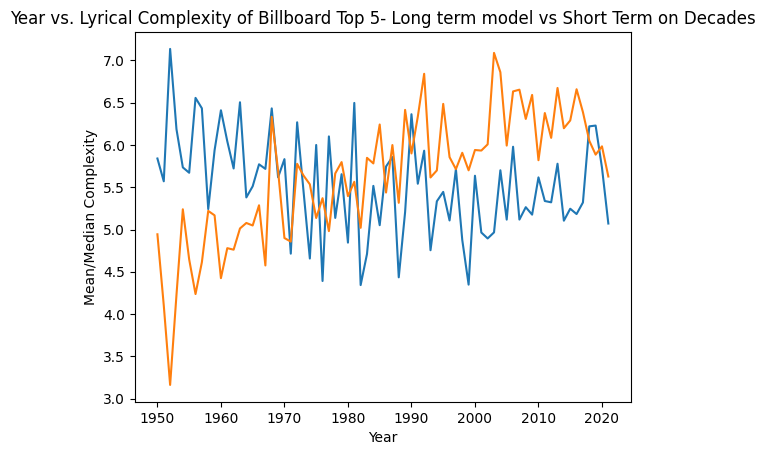

In [18]:
%matplotlib inline


means = df.mean()
means2 = df2.mean()
# medians = df.median()

# Create plot
fig, ax = plt.subplots()

ax.plot(means.index.astype(int), means.values)
# Uncomment to show medians:
ax.plot(means2.index.astype(int), means2.values)

ax.set_xlabel('Year')
ax.set_ylabel('Mean/Median Complexity')
ax.set_title('Year vs. Lyrical Complexity of Billboard Top 5- Long term model vs Short Term on Decades')

plt.show()

# blue is decades

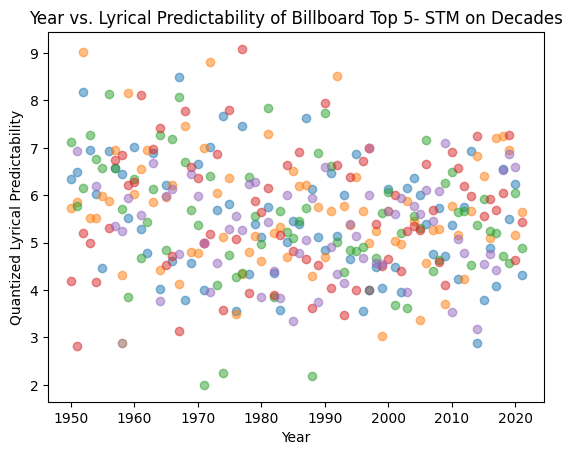

In [19]:
fig, ax = plt.subplots()
for index, row in df.iterrows():
    ax.scatter([int(year) for year in row.index], row.values, alpha=0.5)

ax.set_xlabel('Year')
ax.set_ylabel('Quantized Lyrical Predictability')
ax.set_title('Year vs. Lyrical Predictability of Billboard Top 5- STM on Decades')

plt.show()

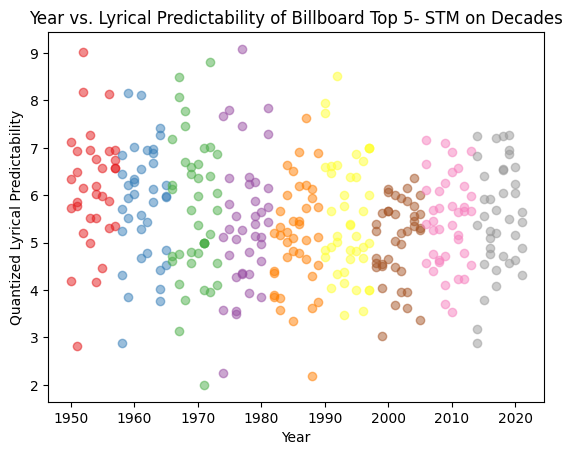

In [20]:
# Define color map and colors
cmap = plt.colormaps.get_cmap('Set1')
colors = np.linspace(0, 1, len(df.columns))

fig, ax = plt.subplots()
for i, (column, color) in enumerate(zip(df.columns, colors)):
    ax.scatter([int(column)] * len(df), df[column], color=cmap(color), alpha=0.5)

ax.set_xlabel('Year')
ax.set_ylabel('Quantized Lyrical Predictability')
ax.set_title('Year vs. Lyrical Predictability of Billboard Top 5- STM on Decades')

plt.show()